# 06. 공산과 가산

In [1]:
# Get utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

In [2]:
from utils import set_pyplot_params
set_pyplot_params()

<br>

## 06.01. 공산

<br>

### 승산 (오즈)
- **이 건이 일어날 확률 vs 일어나지 않았을 확률**

In [5]:
def odds(p):
    return p / (1-p)

- 승률이 75%라면, 이길 가능성이 질 가능성의 3배이므로 승산은 3:1

$$\frac{\frac{3}{4}}{(1-\frac{3}{4})} = 3$$

In [6]:
odds(0.75)

3.0

- 확률이 낮은 경우, 승산 대신 **반대 형식의 공산**으로 나타냄
    - 승률이 10%라면, 승산은 1:9
    - 반대의 공산은 9:1

In [9]:
odds(0.1)

0.11111111111111112

In [10]:
odds(0.9)

9.000000000000002

<br>

- 승산을 소숫점 형태로 바꾸면

$$3:2의 승산\;\rightarrow\; \frac{3}{2}=\frac{x}{1-x}\;\;\rightarrow\;\;x =0.6$$

In [11]:
def prob(o):
    return o / (o+1)

In [12]:
prob(3/2)

0.6

<br>

- 공산을 분수로 나타내고 싶다면

In [15]:
def prob2(yes, no):
    return yes / (yes + no)

In [16]:
prob2(3, 2)

0.6

<br>

- 확률과 공산은 동일한 정보를 다르게 표현

<br>

## 06.02. 베이즈 규칙

베이즈 정리를 **확률형태**로 나타내면

$$P(H|D) = \frac{P(H)~P(D|H)}{P(D)}$$

<br>

승산$A$를 $\mathrm{odds}(A)$로 쓴다면, 베이즈 이론을 **공산형태**로 표현 가능

$$\mathrm{odds}(A|D) = \mathrm{odds}(A)~\frac{P(D|A)}{P(D|B)}$$

**사후 공산은 사전 공산과 우도비의 곱이 됨**

<br>

#### 다시 만난 쿠키 문제

> 쿠키 그릇 두 개가 있다고 가정
>
> * 첫 번째 그릇(그릇 1)에는 바닐라 쿠키 30개와 초콜릿 쿠키 10개가 들어있음
>
> * 두 번째 그릇(그릇 2)에는 바닐라 쿠키와 초콜릿 쿠키가 20개씩 들어있음
>
> 어떤 그릇인지 확인하지 않고, 임의로 그릇을 하나 골라서 거기에서 쿠키를 하나 집었다고 했을 떄, 그 때 그 쿠키가 바닐라 쿠키였다면, 이 바닐라 쿠키가 1번 그릇에서 나왔을 확률은?

<br>

사전확률이 50%이므로, 사전 공산은 1이며, 가능도비는 ($\frac{3}{4}/\frac{1}{2}$)

그러므로 사후 공산은 $1\times1.5=2/3$, 사후 확률은 $3/5$

In [22]:
prior_odds = 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
print(post_odds)

post_prob = prob(post_odds)
print(post_prob)

1.5
0.6


만약, 다른 쿠키를 뽑고 이 쿠키가 초콜릿 쿠키였다면

In [21]:
likelihood_ratio = (1/4) / (1/2)
post_odds *= likelihood_ratio
print(post_odds)

post_prob = prob(post_odds)
print(post_prob)

0.375
0.2727272727272727


<br>

## 06.03. 혈액형 검사 예제


<br>

베이즈 정리

$$\mathrm{odds}(A|D) = \mathrm{odds}(A)~\frac{P(D|A)}{P(D|B)}$$를 $odds(A)$로 나누면

$$\frac{\mathrm{odds}(A|D)}{\mathrm{odds}(A)} = \frac{P(D|A)}{P(D|B)}$$

**좌측 항은 사후 공산과 사전 공산의 비이며, 우측 항은 가능도비로 베이즈 요인(Bayes Factor)**

<br>

- **베이즈 요인이 1보다 크면, 데이터는 B의 가정보다 A의 가정하에 존재하는게 더 가깝다는 뜻이며,**
    
    **데이터를 반영한 후 전보다 공산이 증가하였다는 것을 의미**

- **베이즈 요인이 정확히 1이라면, 데이터는 양쪽 가설 하에서 동일한 가능성을 가지므로, 공산은 변하지 않음**

<br>

> 범죄현장에서 두 사람의 혈흔을 발견했다. 용의자는 혈액 검사 결과 O형이 나왔다. 
> 
> 두 혈흔의 혈액형은 O형 (지역 인구중 60%의 빈도로 나타나는 흔한 혈액형)과 AB형 (1%의 빈도로 나타나는 드문 혈액형)으로 나타났다. 
>
> 이 데이터(범죄 현장의 혈흔)가 용의자가 현장에 혈흔을 남긴 범인 중 한명이라는 질문에 대한 증거가 될 수 있을까?

<br>

- 만약 용의자가 범죄 현장에 혈흔을 남긴 사람 중 하나라면, 용의자는 O형 샘플로 계산되며, **데이터의 확률은 1% (= 임의의 사람이 AB형일 확률)**

    (용의자가 혈흔을 남겼을 때, O형과 AB형 혈흔이 발견될 확률 = $1\times 0.01 = 0.01$)
    
    <br>
    
- 용의자가 현장에 혈흔을 남기지 않았다면, 설명해야 할 샘플이 2개가 필요
    - 전체 인구에서 임의로 두 사람의 혈액형을 검사했을 떄, 한 사람이 O형이고 다른 한 사람이 AB형일 확률은
    
    1. 첫 사람이 O형이고, 두 번쨰 사람이 AB형인 경우
    2. 첫 사람이 AB형이고, 두 번쨰 사람이 O형인 경우
    
    의 2가지를 고려
    
    <br>
    
    - **각 조합에 대한 확률은 (0.6)(0.01)로 이 값은 0.6%이고, 총 확률은 여기에 두 배를 하여 1.2%가 된다**
    
    
**따라서 용의자가 현장에 혈흔을 남긴 사람이 아닐 경우가 좀 더 가능성이 있음**

<br>

$\mathrm{odds}(A|D) = \mathrm{odds}(A)~\frac{P(D|A)}{P(D|B)} = \mathrm{odds}(A|D) = \mathrm{odds}(A)\frac{0.01}{0.012} = \mathrm{odds}(A)0.83$

In [130]:
like1 = 0.01
like2 = 2 * 0.6 * 0.01

likelihood_ratio = like1 / like2
likelihood_ratio

0.8333333333333334

**가능도비는 1보다 작으므로, 혈액형 검사는 용의자가 현장에 혈흔을 남겼다는 가설에 반하는 증거가 된다**

만약 사전공산이 $\mathrm{odds}(A)=$1 (50%의 확률)이라면, 

$$\mathrm{odds}(A|D) = 0.83 = \frac{0.4545..}{1-0.4545...}$$로서

**용의자가 범인일 확률은 45%**

따라서, 데이터는 핵심적인 증거가 될 수 없음

In [135]:
post_odds = odds(0.5) * like1 / like2
prob(post_odds)

0.45454545454545453


<br>

#### 데이터는 항상 가설에 유리한 것은 아님

<br>

- 데이터는 O형이라는 일반적인 사건과 AB형이라는 흔치 않은 사건으로 구성되어 있음

    만약 용의자가 일반적인 사건을 만족한다면, 특이한 사건은 계속 설명 불가능한 상태로 남을 것
    
    만약 용의자가 O형에 대한 사건을 만족하지 않는다면, 모집단에서 AB형인 사람을 고를 두 번의 기회가 더 생긴 것이며 이는 차이를 만들 것

<br>

### 용의자의 유죄에 대한 사전 믿음이 90%일 경우

In [134]:
post_odds = odds(0.95) * like1 / like2
prob(post_odds)

0.9405940594059404

**용의자가 범인일 확률은 94.06%**

<br>

## 06.04. 가산

<br>

2개의 주사위를 굴려서 값을 더할 때, 이 합의 분포

In [41]:
import numpy as np
from empiricaldist import Pmf

In [42]:
def make_die(sides):
    
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    
    return die

육면체 주사위의 경우, 1부터 6까지의 결과가 나올 수 있으며, 결과가 모두 동일

In [69]:
die = make_die(6)
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [70]:
from utils import decorate

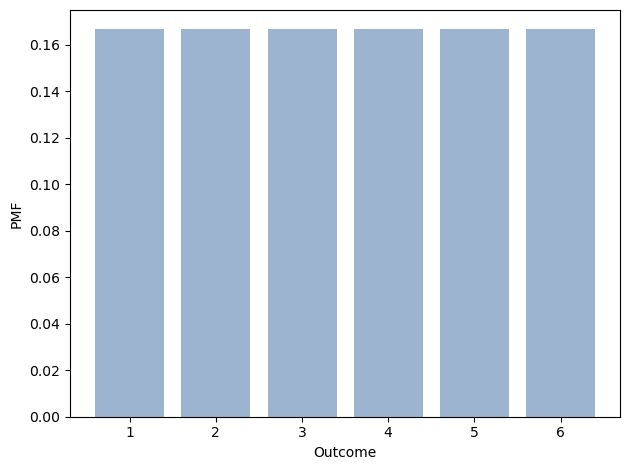

In [71]:
die.bar(alpha=0.4)
decorate(xlabel='Outcome', ylabel='PMF')

만약 주사위 2개를 더해서 합친다면, 2부터 12까지의 11개의 결과가 가능하지만, 이 확률은 동일하지 않음

합의 분포를 구하려면, 가능한 결과를 모두 나열해야 함

In [72]:
def add_dist(pmf1, pmf2):
    
    """합의 분포를 구함"""
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            
            q = q1 + q2
            p = p1 * p2
            res[q] = res(q) + p
            
    return res

위의 함수와 동일한 기능을 하는 `Pmf`라이브러리의 메소드

#### `Pmf.add_dist(Pmf객체1, Pmf객체2)`

In [74]:
twice = Pmf.add_dist(die, die)
#twice = die.add_dist(die)

twice

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [75]:
from utils import decorate

In [76]:
def decorate_dice(title=''):
    
    decorate(xlabel='Outcome', ylabel='PMF', title=title)

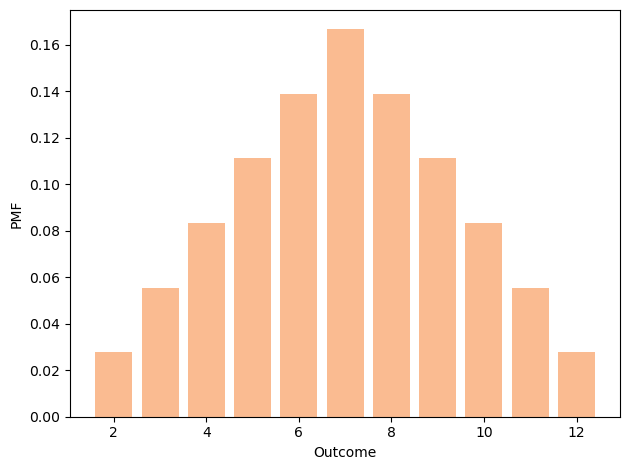

In [77]:
twice = add_dist(die, die)
twice.bar(color='C1', alpha=0.5)
decorate_dice()

주사위를 나타내는 `Pmf`객체의 리스트를 사용하여, 합의 분포를 계산

In [93]:
dice = [die] * 3

In [94]:
def add_dist_seq(seq):
    
    """seq에서 값의 Pmf를 가져와서 계산함수"""
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
        
    return total

In [95]:
thrice = add_dist_seq(dice)
thrice
# twice.add_dist(die)

,probs
3,0.004630
4,0.013889
5,0.027778
6,0.046296
7,0.069444
8,0.097222
9,0.115741
10,0.125000
11,0.125000
12,0.115741


아래의 그래프는 다음의 세 분포 모양을 보여준다

- 한 개의 주사위에서 1부터 6까지 나올 확률은 동일

- 두 주사위의 눈의 합은 2부터 12까지 삼각분포로 나타남

- 세 주사위의 눈의 합은 3부터 18까지 종모양 분포로 나타남

In [86]:
import matplotlib.pyplot as plt

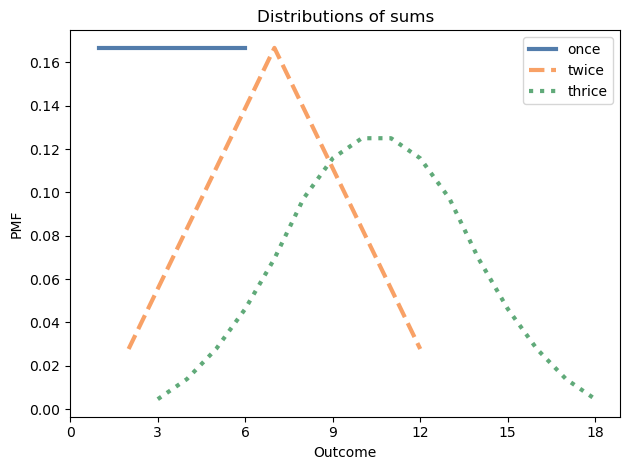

In [87]:
die.plot(label='once')
twice.plot(label='twice', ls='--')
thrice.plot(label='thrice', ls=':')

plt.xticks([0,3,6,9,12,15,18])
decorate_dice(title='Distributions of sums')

#### 이 예는 특정 조건 하에서 합의 분포가 종 모양의 정규분포로 수렴한다는 중심 극한 정리 (CLT) 를 표시

<br>

## 글루텐 민감도

> 35명의 피험자 중 12명이 글루텐이 들어있는 밀가루를 먹는 동안 특정 증상이 발현되었다고 하면서 글루텐을 정확하게 식별
> 
> 다른 17명은 글루텐이 없는 밀가루에서도 어떤 증상이 나타났다고 하였으며, 6명은 아무런 증상도 보이지 않았다
>
> **실험자는 블라인드 글루텐 검사에서 피험자 중 1/3만이 특정 증상을 일으켰다라고 결론을 내림**

<br>

- 이 결론에 대하여,

    글루텐에 민감하지 않은 경우에도, 이중 몇 명이 우연히 글루텐이 든 밀가루를 식별했을 수도 있다
    
    **이 데이터를 근거로, 몇 명의 피험자가 글루텐에 예민하고 몇 명은 단순히 추측했다고 할 수 있을까?**


<br>

#### 베이즈 정리를 통한 모델링을 위하여, 다음과 같은 가정을 수림

- **글루텐에 민감한 사람은 블라인드 검사에서 글루텐 밀가루를 정확히 식별할 확률이 95%**

- **글루텐에 민감하지 않은 사람이 우연히 글루텐 밀가루를 식별할 확률은 40%**

    **(밀가루를 잘못 고르거나 식별하지 못할 확률이 60%)**

<br>

#### 이 문제를 해결하기 위한 2단계

1. **얼마나 많은 피험자가 글루텐에 민감한 지를 알고 있다고 가정한 후 데이터의 분포를 계산 (일반 연산)**
2. **데이터의 가능도를 사용해서, 민감한 피험자 수의 사후분포를 계산 (역산)**

<br>

## 06.06. 일반 연산 문제

**35명의 피험자 중 10명이 글루텐에 민감하다고 가정 $\rightarrow$ 즉, 25명은 민감하지 않음**

In [96]:
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

**민감한 피험자 각각은 글루텐 밀가루를 구분할 수 있는 확률이 95%이므로, 올바른 판별 결과는 이항분포를 따름**

In [97]:
from utils import make_binomial

- 민감한 피험자가 글루텐을 정확히 식별할 확률에 대한 이항분포

In [104]:
dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_sensitive.head()

,probs
0,9.765625e-14
1,1.855469e-11
2,1.586426e-09


- 민감하지 않은 피험자가 글루텐을 정확히 식별할 확률에 대한 이항분포

In [105]:
dist_insensitive = make_binomial(num_insensitive, 0.40)
dist_insensitive.head()

,probs
0,0.000003
1,0.000047
2,0.000379


#### **총 합의 분포 계산**
- 대부분의 민감한 피험자는 글루텐이 든 밀가루를 정확하게 분류했을 것이라고 예상
- 25명의 민감하지 않은 피험자 중에서는 10명 정도가 우연히 글루텐 밀가루를 제대로 분류했다고 예상

    **$\rightarrow$ 대략 20명이 글루텐을 제대로 분류했다고 가정**

In [106]:
dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)

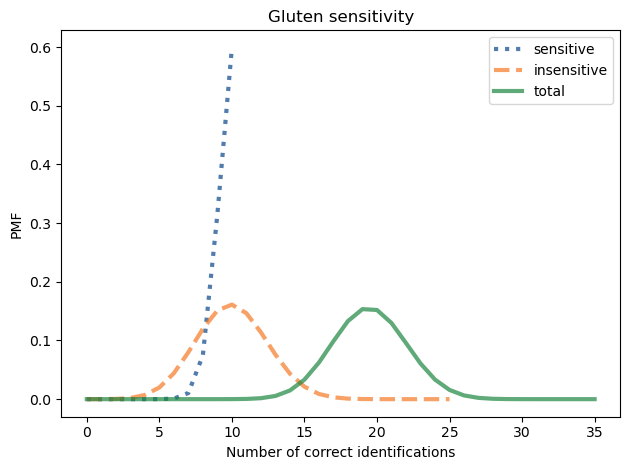

In [108]:
dist_sensitive.plot(label='sensitive', ls=':')
dist_insensitive.plot(label='insensitive', ls='--')
dist_total.plot(label='total')

decorate(xlabel='Number of correct identifications',
         ylabel='PMF',
         title='Gluten sensitivity')

<br>

## 06.07 역산 문제

#### 주어진 데이터를 가지고 민감한 피험자의 수에 대한 사후분포 계산

In [109]:
import pandas as pd

In [110]:
table = pd.DataFrame()

for num_sensitive in range(0, n+1):
    
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)    
    table[num_sensitive] = dist_total

In [115]:
table.head(3)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.719071e-08,1.432559e-09,1.193799e-10,9.948326e-12,8.290272e-13,6.908560e-14,5.757133e-15,4.797611e-16,3.998009e-17,3.331674e-18,...,1.501694e-36,1.251411e-37,1.042843e-38,8.690357e-40,7.241964e-41,6.034970e-42,5.029142e-43,4.190952e-44,3.492460e-45,2.910383e-46
1,4.011165e-07,5.968996e-08,7.162795e-09,7.792856e-10,8.013930e-11,7.944844e-12,7.676178e-13,7.276377e-14,6.796616e-15,6.274653e-16,...,7.508469e-34,6.486483e-35,5.596590e-36,4.823148e-37,4.152060e-38,3.570691e-39,3.067777e-40,2.633315e-41,2.258457e-42,1.935405e-43
2,4.545987e-06,9.741401e-07,1.709122e-07,2.506426e-08,3.269131e-09,3.940182e-10,4.490244e-11,4.908756e-12,5.197412e-13,5.365476e-14,...,1.806613e-31,1.620070e-32,1.449030e-33,1.292922e-34,1.151034e-35,1.022555e-36,9.066202e-38,8.023344e-39,7.088005e-40,6.251357e-41


**실험 내 글루텐에 민감한 사람의 수의 변동에 따른, 정확한 글루텐 감지 수의 분포**

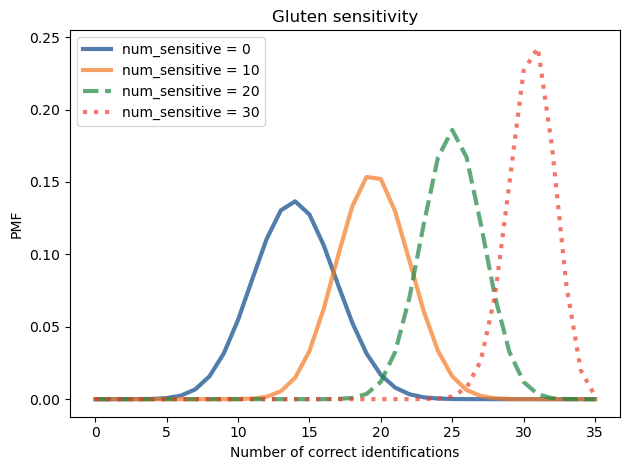

In [117]:
table[0].plot(label='num_sensitive = 0') # 글루텐에 민감한 피실험자가 0명일 떄의, 정확한 글루텐 감지 수의 분포
table[10].plot(label='num_sensitive = 10')
table[20].plot(label='num_sensitive = 20', ls='--')
table[30].plot(label='num_sensitive = 30', ls=':')
    
decorate(xlabel='Number of correct identifications', ylabel='PMF', title='Gluten sensitivity')

<br>

#### 가능도 계산
- **정확한 글루텐 감지의 수가 12일 때의, 실험자내 글루텐에 민감한 피실험자가 존재할 확률**
    
    **(=가능도)**

In [122]:
likelihood1 = table.loc[12]

<br>

#### 글루텐에 민감한 피실험자가 존재할 확률을 균등하게 설정 (균등사전분포)

In [123]:
hypos = np.arange(n+1)
prior = Pmf(1, hypos)

갱신

In [124]:
posterior1 = prior * likelihood1
posterior1.normalize()

0.4754741648615132

- **정확한 글루텐 감지의 수가 20일 때의, 실험내 글루텐에 민감한 피실험자가 존재할 확률**

In [125]:
likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

1.7818649765887375

<br>

#### 12, 20개의 정확한 글루텐 감지에 대한, 글루텐 민감 피실험자 수에 대한 사후분포

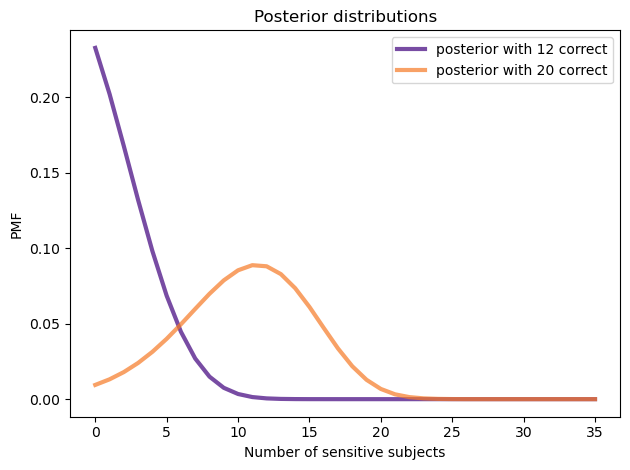

In [127]:
posterior1.plot(label='posterior with 12 correct', color='C4')
posterior2.plot(label='posterior with 20 correct', color='C1')

decorate(xlabel='Number of sensitive subjects',
         ylabel='PMF',
         title='Posterior distributions')

#### 정확한 글루텐의 감지가 12일 경우, 어떤 피험자도 글루텐에 민감하지 않다는 가장 가능성있는 결론이 도출

In [128]:
posterior1.max_prob()

0

#### 정확한 글루텐의 감지가 20일 경우, 가장 가능성 있는 결론은 '실험 내 글루텐에 민감한 피실험자가 11~12명'

In [129]:
posterior2.max_prob()

11